In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:

# Liste des répertoires contenant les fichiers CSV pour chaque label
directories = ['./DONNEES/BRUIT', './DONNEES/INCONNU', './DONNEES/LUMIERE']
labels = [0, 1, 2]  # Labels associés à chaque répertoire

# Listes pour stocker les données, les labels et les noms de fichiers
X = []
y = []
file_info = []  # Nouvelle liste pour stocker les informations de fichiers

# Parcours de chaque répertoire et fichier
for dir_idx, directory in enumerate(directories):
    # Correction pour Windows (chemin absolu ou chemin relatif)
    directory = os.path.abspath(directory)
    
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            # Charger les données du fichier CSV en DataFrame
            df = pd.read_csv(filepath, header=None)
            # Convertir en numpy array
            #data = df.to_numpy().T  
            data = df.to_numpy()
            # Ajouter les données et les labels à nos listes
            X.append(data)
            y.append(labels[dir_idx])
            # Ajouter l'information sur l'origine
            file_info.append((directory, filename))

# Convertir les listes en numpy arrays pour faciliter l'utilisation
X = np.array(X)
y = np.array(y)

# Affichage pour vérification
print(f"Taille de X : {X.shape}")
print(f"Taille de y : {y.shape}")



Taille de X : (371, 99, 33)
Taille de y : (371,)


In [3]:
print(y)
# Afficher la taille de y (nombre total d'éléments)
print(f"Taille de y : {y.shape[0]}")
print(file_info)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
Taille de y : 371
[('e:\\FORMATION\\COURS DEEP LEARNING\\CODE\\KWS\\ENTRAINEMENT\\DONNEES\\BRUIT', 'spectro_1.csv'), ('e:\\FORMATION\\COURS DEEP LEARNING\\CODE\\KWS\\ENTRAINEMENT\\DONNEES\\BRUIT', 'spectro_10.csv'), ('e:\\FORMATION\\COURS DEEP LE

In [4]:
unique_labels = np.unique(y)
print(f"Labels uniques dans y : {unique_labels}")

Labels uniques dans y : [0 1 2]


In [5]:
print("Exemple de données (X[0]):", X[0])
print("Label correspondant (y[0]):", y[0])


Exemple de données (X[0]): [[6.2108 6.6349 6.02   ... 4.0591 4.0972 2.292 ]
 [6.0401 6.1475 6.4205 ... 4.5207 3.5881 2.6785]
 [4.1696 6.114  6.291  ... 4.4067 3.6071 0.7328]
 ...
 [6.3389 6.9104 6.5876 ... 4.6255 4.4424 2.2836]
 [6.0522 6.7762 6.2995 ... 4.3972 4.2948 2.285 ]
 [5.1293 5.3453 6.2848 ... 4.4052 2.8234 0.3028]]
Label correspondant (y[0]): 0


In [6]:

# Étape 2: Division en ensembles d'entraînement et de test

# 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test, file_info_train, file_info_test = train_test_split(X, y, file_info, test_size=0.2, random_state=42)

# Étape 3: Construction du modèle CNN

# Initialisation du modèle séquentiel
model = models.Sequential()

# Couche d'entrée (avec ajout d'une dimension pour le canal des images)
model.add(layers.InputLayer(input_shape=(99, 33, 1)))  # 33x99 est la taille des spectrogrammes

# Première couche de convolution 2D avec MaxPooling
model.add(layers.Conv2D(4, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(5, 5)))
#model.add(layers.Dropout(0.3))

# Deuxième couche de convolution 2D avec MaxPooling
model.add(layers.Conv2D(4, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(5, 5)))
#model.add(layers.Dropout(0.3))

# Aplatissement des données pour les couches denses
model.add(layers.Flatten())

# Couche dense avec activation ReLU
model.add(layers.Dense(16, activation='relu'))

# Couche de sortie avec activation softmax (pour classification multiclasses)
model.add(layers.Dense(3, activation='softmax'))  # 3 classes de sortie

# Compilation du modèle
# model.compile(optimizer='adam', 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])
# Compilation du modèle avec un taux d'apprentissage personnalisé
model.compile(optimizer='Adam',  # Taux d'apprentissage personnalisé
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


# Affichage du résumé du modèle
model.summary()

C:\Users\Bertrand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 99, 33, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 19, 6, 4)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 19, 6, 4)       │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 1, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 447 (1.75 KB)

 Trainable params: 447 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:

# Étape 4:  Reshape des données d'entrée pour inclure le canal (nécessaire pour Conv2D)

# Reshape des données d'entrée pour inclure le canal (nécessaire pour Conv2D)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [8]:
# Entraînement du modèle
class_weights = {0: 1.0, 1: 1.0, 2: 3.0}  # Poids plus élevé pour la Classe 0
model.fit(X_train, y_train, validation_data=(X_test, y_test), class_weight=class_weights, epochs=300, batch_size=32)

# Étape 5: Évaluation du modèle
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Précision sur le jeu de test: {test_acc * 100:.2f}%')


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3340 - loss: 2.2403 - val_accuracy: 0.2933 - val_loss: 1.0973
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3530 - loss: 2.0170 - val_accuracy: 0.2267 - val_loss: 1.0953
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2038 - loss: 1.8324 - val_accuracy: 0.3067 - val_loss: 1.0918
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3596 - loss: 1.7893 - val_accuracy: 0.3067 - val_loss: 1.0920
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4481 - loss: 1.7683 - val_accuracy: 0.3200 - val_loss: 1.0920
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4668 - loss: 1.7717 - val_accuracy: 0.3200 - val_loss: 1.0903
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4014 - loss: 1.7193 - val_accuracy: 0.3067 - val_loss: 1.0896
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4490 - loss: 1.7359 - val_accuracy: 0.3067 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Matrice de confusion :
[[22 10  1]
 [ 6 14  3]
 [ 0  7 12]]


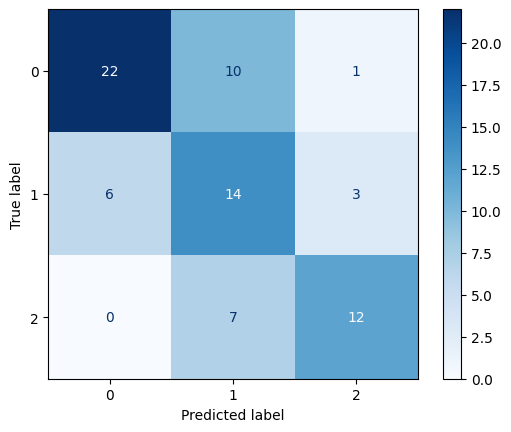

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
# Afficher la matrice de confusion en texte
print("Matrice de confusion :")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Sauvegarde du modèle converti
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Bertrand\AppData\Local\Temp\tmp67d2s5yq\assets


INFO:tensorflow:Assets written to: C:\Users\Bertrand\AppData\Local\Temp\tmp67d2s5yq\assets


Saved artifact at 'C:\Users\Bertrand\AppData\Local\Temp\tmp67d2s5yq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 99, 33, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2196922358800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196922360336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196922361680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196922362640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196922364368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196922364944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196922364560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2196922366096: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pandas as pd  # N'oublie pas d'importer pandas si ce n'est pas déjà fait

# Filtrer les exemples appartenant au groupe "LUMIERE" (supposons que le label pour "LUMIERE" soit 2)
lumiere_indices = [i for i, label in enumerate(y_test) if label == 2]

# Étape 1: Sélectionner un exemple aléatoire parmi les fichiers "LUMIERE"
random_index = random.choice(lumiere_indices)
example = X_test[random_index]
example_label = y_test[random_index]

# Récupérer les informations de fichier correspondant à cet exemple
file_info_selected = file_info_test[random_index]

# Reshape pour inclure le canal (1 pour les images en niveaux de gris)
if len(example.shape) == 3:  # Vérifie si l'image a 3 dimensions
    example = np.expand_dims(example, axis=0)  # Ajoute la dimension du batch

# Étape 2: Exécuter le modèle sur cet exemple
prediction = model.predict(example)

# Étape 3: Afficher les résultats
print(f"Exemple sélectionné (index {random_index}):")
print(f"Label réel: {example_label}")
print(f"Prédictions du modèle (probabilités): {prediction[0]}")
print(f"Classe prédite: {np.argmax(prediction)}")
print(f"Informations sur le fichier : {file_info_selected}")

# Afficher les premières valeurs stockées dans example
# Affichage des premières valeurs selon la structure originale
# Par exemple, si c'est une image avec shape (1, 33, 98, 1), vous pouvez voir une section spécifique
print("Premières valeurs selon la structure originale :")
print(example[0, :5, :5, 0])  # Affiche un bloc 5x5 de l'image

# Étape 4: Charger et afficher le contenu du fichier CSV à l'adresse pointée par file_info_selected
chemin_fichier = file_info_selected[0] + "\\" + file_info_selected[1]  # Ajoute manuellement le nom du fichier
donnees_csv = pd.read_csv(chemin_fichier, header=None)

# Afficher les premières lignes du CSV pour comparaison
print("Premières lignes du fichier CSV :")
print(donnees_csv.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Exemple sélectionné (index 74):
Label réel: 2
Prédictions du modèle (probabilités): [1.5866537e-04 1.9022958e-02 9.8081839e-01]
Classe prédite: 2
Informations sur le fichier : ('e:\\FORMATION\\COURS DEEP LEARNING\\CODE\\KWS\\ENTRAINEMENT\\DONNEES\\LUMIERE', 'spectro_75.csv')
Premières valeurs selon la structure originale :
[[1.6876 1.7776 1.7573 0.9151 1.4714]
 [2.4299 2.0769 1.6436 1.5895 1.1033]
 [0.8151 1.7836 1.8631 1.7964 1.4569]
 [2.1959 2.0992 1.5945 1.3002 1.3462]
 [3.6108 3.6271 3.4053 3.2171 3.0416]]
Premières lignes du fichier CSV :
       0       1       2       3       4       5       6       7       8   \
0  1.6876  1.7776  1.7573  0.9151  1.4714  1.2246  1.5855  1.0267  1.3824   
1  2.4299  2.0769  1.6436  1.5895  1.1033  1.4234  0.9411  1.1264  0.6304   
2  0.8151  1.7836  1.8631  1.7964  1.4569  1.0803  1.6377  1.3870  1.0085   
3  2.1959  2.0992  1.5945  1.3002  1.3462  1.3159  1.2989  1.3470 -0.4274   
4  3.6108  3.6271  3.4053  

In [12]:
# Sauvegarde du modèle Keras au format HDF5 (.h5)
model.save('mon_modele_keras.h5')

In [13]:
def representative_dataset():
    for i in range(len(X_train)):
        # Extraire un seul échantillon (sans batch dimension)
        sample = X_train[i:i+1].astype(np.float32)
        yield [sample]

# Reprendre la conversion avec quantification
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

# Essayer à nouveau la conversion
tflite_quant_model = converter.convert()

# Sauvegarder le modèle quantifié
with open('model_quant.tflite', 'wb') as f:
    f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: C:\Users\Bertrand\AppData\Local\Temp\tmpfbyueqgh\assets


INFO:tensorflow:Assets written to: C:\Users\Bertrand\AppData\Local\Temp\tmpfbyueqgh\assets


In [14]:
# Lire le fichier .tflite et le convertir en un tableau d'octets
with open('model.tflite', 'rb') as f:
    model_content = f.read()

# Créer une représentation sous forme de tableau en C sans retour à la ligne
model_c_array = ', '.join(f'0x{byte:02x}' for byte in model_content)

# Ajouter les déclarations C avec les nouveaux noms de variables
model_c_source = f"""
#include <cstdint>

const unsigned char converted_model_tflite[] = {{
{model_c_array}
}};

const unsigned int converted_model_tflite_len = {len(model_content)};
"""

# Sauvegarder dans un fichier .h
with open('converted_model.h', 'w') as f:
    f.write(model_c_source)

print("Modèle converti avec succès et sauvegardé dans converted_model.h")


Modèle converti avec succès et sauvegardé dans converted_model.h


In [15]:

import tensorflow as tf

def get_ops_details(interpreter):
    ops_details = []
    tensor_details = interpreter.get_tensor_details()

    for detail in tensor_details:
        tensor_index = detail['index']
        tensor_name = detail['name']
        tensor_shape = detail['shape']
        tensor_dtype = detail['dtype']
        ops_details.append({
            'index': tensor_index,
            'name': tensor_name,
            'shape': tensor_shape,
            'dtype': tensor_dtype
        })

    return ops_details

def get_operator_details(interpreter):
    op_details = []
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    all_tensor_details = interpreter.get_tensor_details()

    # Map tensor index to tensor name for easy reference
    tensor_index_to_name = {tensor['index']: tensor['name'] for tensor in all_tensor_details}

    for input_detail in input_details:
        op_details.append({
            'type': 'Input',
            'name': tensor_index_to_name[input_detail['index']],
            'shape': input_detail['shape'],
            'dtype': input_detail['dtype']
        })

    for output_detail in output_details:
        op_details.append({
            'type': 'Output',
            'name': tensor_index_to_name[output_detail['index']],
            'shape': output_detail['shape'],
            'dtype': output_detail['dtype']
        })

    return op_details

# Charger le modèle TFLite
interpreter = tf.lite.Interpreter(model_path='model_quant.tflite')
interpreter.allocate_tensors()

# Obtenir les détails des tenseurs
tensor_ops_details = get_ops_details(interpreter)

# Obtenir les détails des opérations
op_details = get_operator_details(interpreter)

# Afficher les détails des tenseurs
print("Détails des tenseurs:")
for tensor in tensor_ops_details:
    print(f"Index: {tensor['index']}, Name: {tensor['name']}, Shape: {tensor['shape']}, Dtype: {tensor['dtype']}")

# Afficher les détails des opérations
print("\nDétails des opérations:")
for op in op_details:
    print(f"Type: {op['type']}, Name: {op['name']}, Shape: {op['shape']}, Dtype: {op['dtype']}")


Détails des tenseurs:
Index: 0, Name: input_1_int8, Shape: [ 1 99 33  1], Dtype: <class 'numpy.int8'>
Index: 1, Name: sequential/conv2d/BiasAdd/ReadVariableOp/resource, Shape: [4], Dtype: <class 'numpy.int32'>
Index: 2, Name: sequential/conv2d_1/BiasAdd/ReadVariableOp/resource, Shape: [4], Dtype: <class 'numpy.int32'>
Index: 3, Name: sequential/dense/BiasAdd/ReadVariableOp/resource, Shape: [16], Dtype: <class 'numpy.int32'>
Index: 4, Name: sequential/dense_1/BiasAdd/ReadVariableOp/resource, Shape: [3], Dtype: <class 'numpy.int32'>
Index: 5, Name: sequential/flatten/Const, Shape: [2], Dtype: <class 'numpy.int32'>
Index: 6, Name: sequential/dense/MatMul, Shape: [16 12], Dtype: <class 'numpy.int8'>
Index: 7, Name: sequential/dense_1/MatMul, Shape: [ 3 16], Dtype: <class 'numpy.int8'>
Index: 8, Name: sequential/conv2d/Conv2D, Shape: [4 3 3 1], Dtype: <class 'numpy.int8'>
Index: 9, Name: sequential/conv2d_1/Conv2D, Shape: [4 3 3 4], Dtype: <class 'numpy.int8'>
Index: 10, Name: sequential/co